# Assignment on Polynomial Regression


In [125]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection,linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

%matplotlib inline

## load dataset
I have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for a vehicle

In [126]:
df = pd.read_csv('data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [127]:
df.shape

(1067, 13)

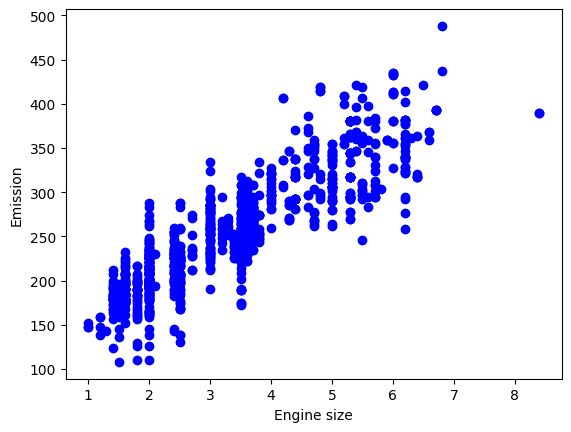

In [128]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

let use polynomial regression to create a model to predict CO2 emission by given engine size

In [153]:
X = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]

In [154]:

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [155]:
X_train = np.asanyarray(X_train[['ENGINESIZE']])
y_train = np.asanyarray(y_train[['CO2EMISSIONS']])

X_test = np.asanyarray(X_test[['ENGINESIZE']])
y_test = np.asanyarray(y_test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  2.5 ,  6.25],
       ...,
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  3.8 , 14.44],
       [ 1.  ,  3.  ,  9.  ]])

In [156]:
# create a model
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [157]:
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[ 0.         52.77661404 -1.81430401]]
Intercept:  [103.6665099]


Text(0, 0.5, 'Emission')

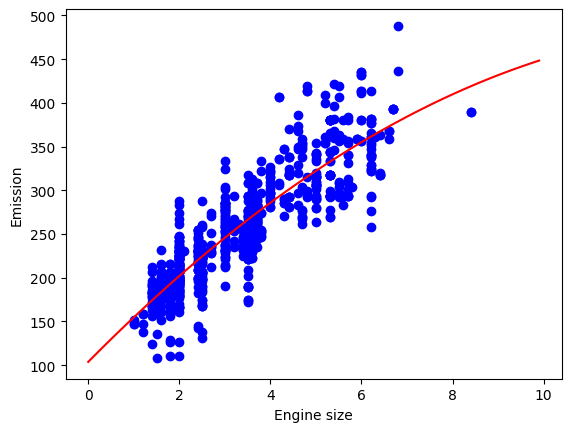

In [158]:
plt.scatter(X_train, y_train,  color='blue')
X = np.arange(0.0, 10.0, 0.1)
y = model.intercept_[0]+ model.coef_[0][1]*X + model.coef_[0][2]*np.power(X, 2)
plt.plot(X, y, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Model Evaluation

In [159]:
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

In [161]:
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error (MSE): {:.2f}".format(mean_squared_error(y_test,y_pred)))
print("Accuracy: {:.2f}".format(r2_score(y_test,y_pred)))


Mean absolute error: 22.83
Mean Squared Error (MSE): 848.01
Accuracy: 0.78
